In [18]:
%matplotlib inline
#from matplotlib import style
#import matplotlib.style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [5]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [20]:
# reflect an existing database into a new model
engine = create_engine('sqlite:///hawaii.sqlite')
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)


In [21]:
# We can view all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)
#session.query(Measurement.station,func.count(Measurement.station)).group_by (Measurement.station).order_by(func.count(Measurement.station).desc())\
#        .all()

#q = session.query(Measurement).all()
#q.column_descriptions
#query(Measurement.station, func.count(Measurement.station)).\
#group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



#first_row = session.query(Measurement).first()
#irst_row.__dict__

#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
          #   order_by(func.count(Measurement.station).desc()).all()


#inspector = inspect(engine)
#inspector.get_columns('measurement')
#for column in inspector.get_columns('measurement'):
#    print(column)


# Exploratory Climate Analysis

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


<AxesSubplot:xlabel='date'>

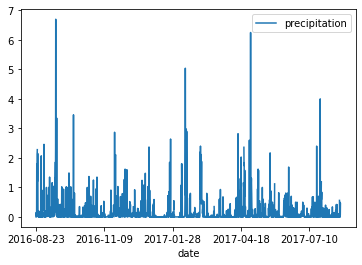

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 




# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
inspector = inspect(engine)
for column in inspector.get_columns('measurement'):
    print(column)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).order_by(Measurement.date)
results.all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))

# Sort the dataframe by date

df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()


In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()




,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge